# Пример стандартной классификационной нейронной сети написанной вручную

## Импортируем всё необходимое

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import expit # Импорт функции сигмоиды

## Создаём класс нейронной сети

In [2]:
class newral_network:
    
    # Инициализация нейронной сети
    def __init__(self, input_nodes,
                 hidden_nodes, output_nodes,
                 learning_rate):
        # Задаём количество узлов во входном, скрытом и выходном слое
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        # Коэффициент обучения
        self.lr = learning_rate
        
        # Создание весовых коэффициентов
        self.wih = np.random.normal(0, pow(self.hnodes, -0.5),
                                    (self.hnodes, self.inodes))
        self.who = np.random.normal(0, pow(self.onodes, -0.5),
                                    (self.onodes, self.hnodes))
        
        # Использование сигмоиды в качестве функции активации 
        self.activation_function = lambda x: expit(x)
        pass
    
    
    # Тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # Преобразование списка входных значений в вектор-столбец
        inputs = np.array(inputs_list, ndmin = 2).T
        # Преобразование списка целевых значений в вектор-столбец
        targets = np.array(targets_list, ndmin=2).T
        
        # Расчёт входных сигналов для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # Расчёт исходящих сигналов для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Расчёт входных сигналов для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # Расчёт исходящих сигналов для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        # Ошибки выходного слоя = (целевое значение - фактическое значение) 
        output_errors = targets - final_outputs
        
        # Ошибки скрытого слоя - это ошибки output_errors,
        # распределённые пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах 
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # обновить весовые коэффициенты для связей между
        # скрытым и выходным слоями
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                        np.transpose(hidden_outputs))

        # обновить весовые коэффициенты для связей между
        # входным и скрытым слоями
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        np.transpose(inputs))
        
        pass
    

    # Тестирование нейронной сети
    def query(self, inputs_list):
        # Преобразование списка входных значений в двухмерный массив
        inputs = np.array(inputs_list, ndmin = 2).T
        
        # Расчёт входных сигналов для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # Расчёт исходящих сигналов для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Расчёт входных сигналов для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # Расчёт исходящих сигналов для выходного слоя 
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

## Создаём конкретную нейронную сеть как объект класса

In [3]:
# Количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# Коэффициент обучения
learning_rate = 0.1

# Создание экземпляра нейронной сети
n = newral_network(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
# Загрузка в список тренировочного набора данных CSV-файла набора MNIST 
training_data_file = open('mnist_dataset/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines() 
training_data_file.close()

In [5]:
# Тренировка нейронной сети

# Переменная epochs указывает, сколько раз тренировочный набор данных используется для тренировки сети 
epochs = 5

for e in range(epochs):
    # Перебираем все записи в тренировочном наборе данных 
    for record in training_data_list:
        # Получаем список значений, используя символы запятой (',') в качестве разделителей 
        all_values = record.split(',')
        
        # Масштабируем и смещаем входные значения
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # Создаём целевые выходные значения (все равны 0,01, за исключением желаемого маркерного значения, равного 0,99) 
        targets = np.zeros(output_nodes) + 0.01
        
        # all_values[0] - целевое маркерное значение для данной записи 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
    
        pass
    pass

## Тестируем полученную сеть

In [6]:
# Загрузка в список тестового набора данных CSV-файла набора MNIST 
test_data_file = open('mnist_dataset/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines() 
test_data_file.close()

In [7]:
# Получаем первую тестовую запись
all_values = test_data_list[0].split(',')
# Выводим целевое значение
print(all_values[0])

7


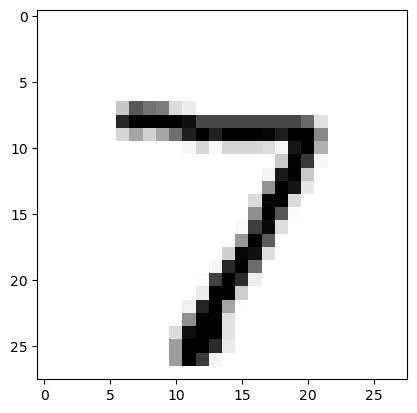

In [8]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys');

In [9]:
n.query((np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01)

array([[0.00785342],
       [0.00500173],
       [0.00754216],
       [0.00379494],
       [0.00641034],
       [0.00755525],
       [0.00836815],
       [0.99618345],
       [0.00213387],
       [0.01255749]])

In [10]:
# Тестирование нейронной сети

# Журнал оценок работы сети, первоначально пустой 
scorecard = []

# Перебираем все записи в тестовом наборе данных 
for record in test_data_list:
    # Получаем список значений из записи, используя символы запятой (',') в качестве разделителей 
    all_values = record.split(',')
    
    # Правильный ответ - первое значение 
    correct_label = int(all_values[0])
    #print(correct_label, "истинный маркер")
    
    # Масштабируем и смещаем входные значения
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # Опрос сети
    outputs = n.query(inputs)
    
    # Индекс наибольшего значения является маркерным значением 
    label = np.argmax(outputs)
    #print(label, "ответ сети")
    
    # Присоединяем оценку ответа сети к концу списка 
    if (label == correct_label):
        # В случае правильного ответа сети присоединить к списку значение 1 
        scorecard.append(1)
    else:
        # В случае неправильного ответа сети присоединить к списку значение 0 
        scorecard.append(0) 
        pass
    
    pass

In [11]:
#print(scorecard)
print('Эффективность нейронной сети =', sum(scorecard)/len(scorecard))

Эффективность нейронной сети = 0.9724
